In [1]:
# to import the required libraries
import pandas as pd
import numpy as np
import datetime

## Import data into Python environment.


In [2]:
data = pd.read_csv(r"C:\Users\ridhi.jain\Python\Project 3\Comcast_telecom_complaints_data.csv")
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
# to check presence of missing values
missing_values_count = data.isnull().sum()
missing_values_count[0:11]

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

## Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [4]:
# to check the data type of the date column
data['Date'].dtype

dtype('O')

In [5]:
# to convert the data type of the date column from object to datetime type
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%y")
data['Date'].head()

0   2015-04-22
1   2015-08-04
2   2015-04-18
3   2015-07-05
4   2015-05-26
Name: Date, dtype: datetime64[ns]

In [6]:
# to count the number of complaints in a particular month
month_of_the_complaint = data['Date'].groupby(data['Date'].dt.month).count()
month_of_the_complaint

Date
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
Name: Date, dtype: int64

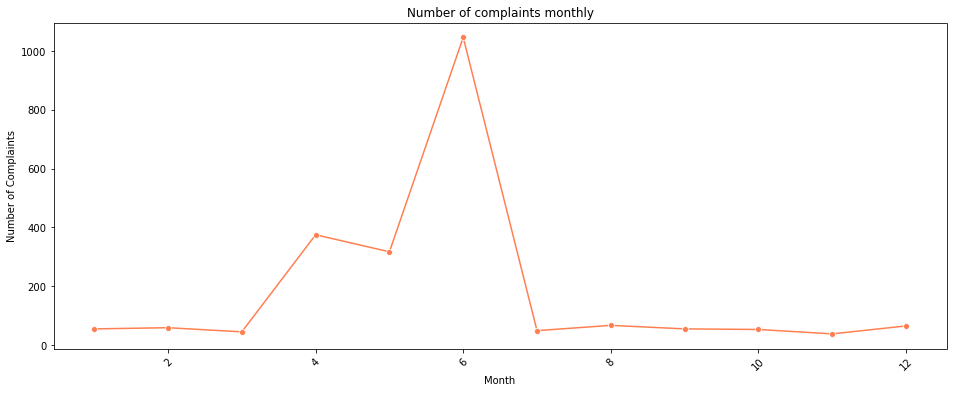

In [7]:
# graph-1a showing trend for the number of complaints monthly
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
plt.title("Number of complaints monthly")
plt.ylabel("Number of Complaints")
plt.xlabel("Month")
plt.xticks(rotation=45)
sns.lineplot(data= month_of_the_complaint, color = "coral", marker = 'o')

Text(0, 0.5, 'No. of complaints')

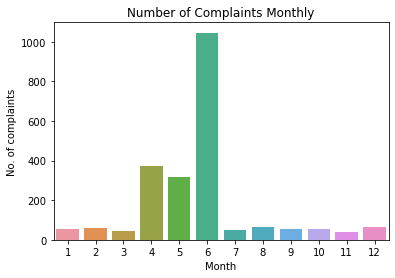

In [8]:
# graph-1b showing trend for the number of complaints monthly
sns.barplot(x=month_of_the_complaint.index, y= month_of_the_complaint)
plt.title("Number of Complaints Monthly")
plt.xlabel("Month")
plt.ylabel("No. of complaints")

In [9]:
date_of_the_complaint = data['Date'].groupby(data['Date']).count()
date_of_the_complaint

Date
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Name: Date, Length: 91, dtype: int64

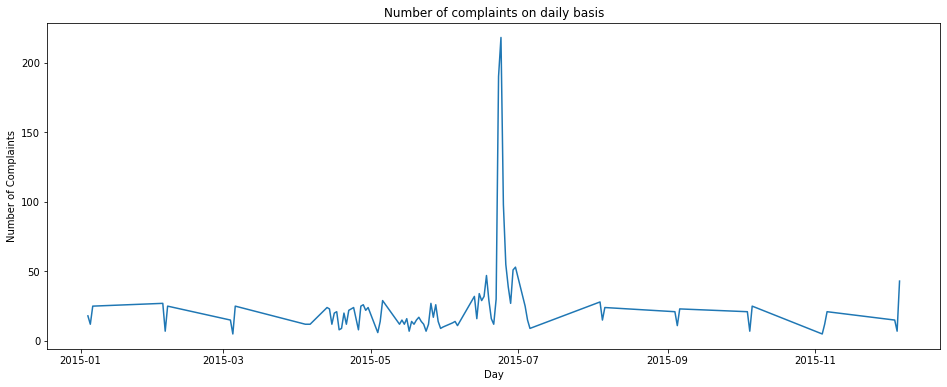

In [10]:
# graph showing trend for the number of complaints on daily basis
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title("Number of complaints on daily basis")
plt.ylabel("Number of Complaints")
plt.xlabel("Day")
sns.lineplot(data=date_of_the_complaint)
# sns.lineplot(data= data['Date'].dt.day, )

## Provide a table with the frequency of complaint types.
### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [11]:
# to split each row into a single series of words
split_data = data['Customer Complaint'].str.split(n=- 1, expand=False)
# split_data
split_data.count()

2224

In [12]:
# function to count the types are maximum i.e., around internet, network issues, or across any other domains
def number_of_complaints(fname):
    n = 0
    for i in split_data:
        for text in i:
            if (text == fname):
                n +=1
    return(n)

In [13]:
# types of complaint
complaints_around_internet = number_of_complaints("Internet")+ number_of_complaints("internet")
complaints_around_network_issues = number_of_complaints("Comcast") + number_of_complaints("comcast") + number_of_complaints("network") + number_of_complaints("Network")
other_types_complaints = split_data.count() - (complaints_around_internet + complaints_around_network_issues)
print ("Types of Complaints:\nNumber of complaints around Internet is {}\nNumber of complaints around Network Issues is {}\nNumber of other types of complaints is {}".format(complaints_around_internet,complaints_around_network_issues,other_types_complaints))

Types of Complaints:
Number of complaints around Internet is 499
Number of complaints around Network Issues is 1123
Number of other types of complaints is 602


## Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [14]:
# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open 
# and Closed & Solved is to be categorized as Closed.
data['Revised_Status'] = ["Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in data["Status"]]

In [15]:
data['Revised_Status'].value_counts()

Closed    1707
Open       517
Name: Revised_Status, dtype: int64

## Provide state wise status of complaints in a stacked bar chart

In [16]:
statewise_status = data.groupby(['State','Revised_Status']).size().unstack().fillna(0)
statewise_status

Revised_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


Text(0, 0.5, 'Complaints')

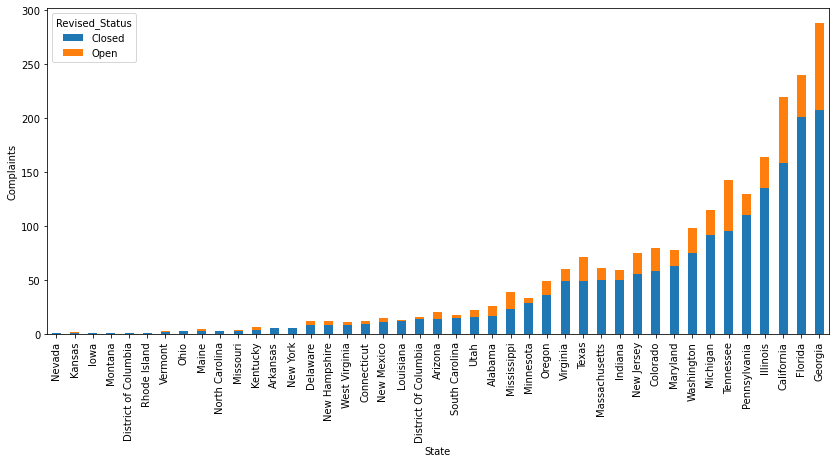

In [17]:
statewise_status.sort_values('Closed',axis = 0,ascending=True).plot(kind="bar", figsize=(14,6), stacked=True)
plt.ylabel("Complaints")

## i) Which state has the maximum complaints
## ii) Which state has the highest percentage of unresolved complaints



In [18]:
statewise_status.sort_values(by = 'Open', ascending = False)

Revised_Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [19]:
Compalaints_recieved_via = data.groupby(['Received Via', 'Revised_Status'])
Compalaints_recieved_via.size().unstack()

Revised_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [20]:
complaint_resolved_percentage = (864+843)/(data['Revised_Status'].count()) * 100

In [21]:
complaint_resolved_percentage

76.75359712230215